<a href="https://colab.research.google.com/github/kazuomaru9/Finalassignment_Kazuma_IKESAWA/blob/main/LLaVA_JP_1_3B_Colaboratory_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 必要パッケージインストール

In [1]:
!pip install accelerate -U
!pip install transformers[torch]
!pip install open-clip-torch
!pip install einops

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.33.0
    Uninstalling accelerate-0.33.0:
      Successfully uninstalled accelerate-0.33.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 56.3 MB/s eta 0:00:00


# リポジトリクローン

In [2]:
!git clone https://github.com/tosiyuki/LLaVA-JP.git
%cd LLaVA-JP

Cloning into 'LLaVA-JP'...
remote: Enumerating objects: 196, done.
remote: Counting objects: 100% (74/74), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 196 (delta 63), reused 59 (delta 59), pack-reused 122 (from 1)
Receiving objects: 100% (196/196), 429.25 KiB | 1.56 MiB/s, done.
Resolving deltas: 100% (102/102), done.
/content/LLaVA-JP


# インポート

In [3]:
import requests
import torch
import transformers
from PIL import Image

from transformers.generation.streamers import TextStreamer
from llava.constants import DEFAULT_IMAGE_TOKEN, IMAGE_TOKEN_INDEX
from llava.conversation import conv_templates, SeparatorStyle
from llava.model.llava_gpt2 import LlavaGpt2ForCausalLM
from llava.train.arguments_dataclass import ModelArguments, DataArguments, TrainingArguments
from llava.train.dataset import tokenizer_image_token

# 各種引数 取得

In [4]:
parser = transformers.HfArgumentParser((ModelArguments, DataArguments, TrainingArguments))
model_args, data_args, training_args = parser.parse_args_into_dataclasses(args=[])

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


# モデルロード

In [5]:
model_path = 'toshi456/llava-jp-1.3b-v1.0'
model_args.vision_tower = "openai/clip-vit-large-patch14-336"

device = "cuda" if torch.cuda.is_available() else "cpu"
torch_dtype = torch.bfloat16 if device=="cuda" else torch.float32

model = LlavaGpt2ForCausalLM.from_pretrained(
    model_path,
    low_cpu_mem_usage=True,
    use_safetensors=True,
    torch_dtype=torch_dtype,
    device_map=device,
    attn_implementation="eager",
)
tokenizer = transformers.AutoTokenizer.from_pretrained(
    model_path,
    model_max_length=1024,
    padding_side="right",
    use_fast=False,
)
model.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

You are using a model of type llava to instantiate a model of type llava-jp. This is not supported for all configurations of models and can yield errors.


model.safetensors.index.json:   0%|          | 0.00/71.1k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.32G [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.76k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.71G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:2068: UserWarning: for vision_model.embeddings.class_embedding: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(f'for {key}: copying from a non-meta parameter in the checkpoint to a meta '
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:2068: UserWarning: for vision_model.embeddings.patch_embedding.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(f'for {key}: copying from a non-meta parameter in the checkpoint to a meta '
/usr/local/lib/py

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

tokenizer_config.json:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.24M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/276 [00:00<?, ?B/s]

LlavaGpt2ForCausalLM(
  (transformer): GPT2Model(
    (wte): Embedding(50688, 2048)
    (wpe): Embedding(2048, 2048)
    (drop): Dropout(p=0.1, inplace=False)
    (h): ModuleList(
      (0-23): 24 x GPT2Block(
        (ln_1): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (attn): GPT2Attention(
          (c_attn): Conv1D()
          (c_proj): Conv1D()
          (attn_dropout): Dropout(p=0.1, inplace=False)
          (resid_dropout): Dropout(p=0.1, inplace=False)
        )
        (ln_2): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
        (mlp): GPT2MLP(
          (c_fc): Conv1D()
          (c_proj): Conv1D()
          (act): GELUActivation()
          (dropout): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((2048,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): Linear(in_features=2048, out_features=50688, bias=False)
  (model): LlavaGpt2Model(
    (vision_tower): CLIPVisionTower(
      (vision_tower): CLIPVisionModel(
   

# テスト画像ダウンロード

In [6]:
!wget https://huggingface.co/rinna/bilingual-gpt-neox-4b-minigpt4/resolve/main/sample.jpg

--2024-09-11 15:18:59--  https://huggingface.co/rinna/bilingual-gpt-neox-4b-minigpt4/resolve/main/sample.jpg
Resolving huggingface.co (huggingface.co)... 18.164.174.55, 18.164.174.17, 18.164.174.23, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.55|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71278 (70K) [image/jpeg]
Saving to: ‘sample.jpg’

sample.jpg          100%[===================>]  69.61K  --.-KB/s    in 0.01s   

2024-09-11 15:19:00 (4.90 MB/s) - ‘sample.jpg’ saved [71278/71278]



# テスト画像読み込み

In [34]:
image = Image.open('kashima.jpg').convert('RGB')
if device == "cuda":
    image_tensor = model.get_model().vision_tower.image_processor(image, return_tensors='pt')['pixel_values'].half().cuda().to(torch_dtype)
else:
    image_tensor = model.get_model().vision_tower.image_processor(image, return_tensors='pt')['pixel_values'].to(torch_dtype)

# プロンプト準備

In [35]:
input_text = "どのような画像か説明してください"

In [36]:
conv_mode = "v1"
conv = conv_templates[conv_mode].copy()

# ユーザー: <image>\n{prompt}
prompt = input_text
inp = DEFAULT_IMAGE_TOKEN + '\n' + prompt
conv.append_message(conv.roles[0], inp)
conv.append_message(conv.roles[1], None)
prompt = conv.get_prompt()

input_ids = tokenizer_image_token(
    prompt,
    tokenizer,
    IMAGE_TOKEN_INDEX,
    return_tensors='pt'
).unsqueeze(0)
if device == "cuda":
    input_ids = input_ids.to(device)

input_ids = input_ids[:, :-1] # </sep>がinputの最後に入るので削除する

stop_str = conv.sep if conv.sep_style != SeparatorStyle.TWO else conv.sep2
keywords = [stop_str]
streamer = TextStreamer(tokenizer, skip_prompt=True, timeout=20.0)

# 推論

In [37]:
%%time

with torch.inference_mode():
    output_ids = model.generate(
        inputs=input_ids,
        images=image_tensor,
        do_sample=True,
        temperature=0.01,
        top_p=1.0,
        max_new_tokens=256,
        streamer=streamer,
        use_cache=False,
    )

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:7 for open-end generation.


画像は、スタジアムで行われているサッカーの試合を捉えたものである。スタジアムには多くの観客が集まり、試合を観戦している。スタジアムの周りには、スタンドに座っている人、立っている人、さまざまな位置にいる人など、何人かの人がいる。スタジアムのあちこちに、試合を観戦しているのか、あるいは単に試合を楽しんでいるのか、何人かの人が散らばっている。スタジアムのあちこちに、試合を観戦しているのか、それとも単に試合を楽しんでいるのか、何人かの人が散らばっている。スタジアムのあちこちに、試合を観戦しているのか、それとも単に試合を楽しんでいるのか、何人かの人が散らばっている。<EOD|LLM-jp>
CPU times: user 2min 59s, sys: 206 ms, total: 3min
Wall time: 3min


In [32]:
# 後処理
output_ids = [token_id for token_id in output_ids.tolist()[0] if token_id != IMAGE_TOKEN_INDEX]
output = tokenizer.decode(output_ids, skip_special_tokens=True)

target = "システム: "
idx = output.find(target)
output_text = output[idx+len(target):]

AttributeError: 'list' object has no attribute 'tolist'

# 結果確認

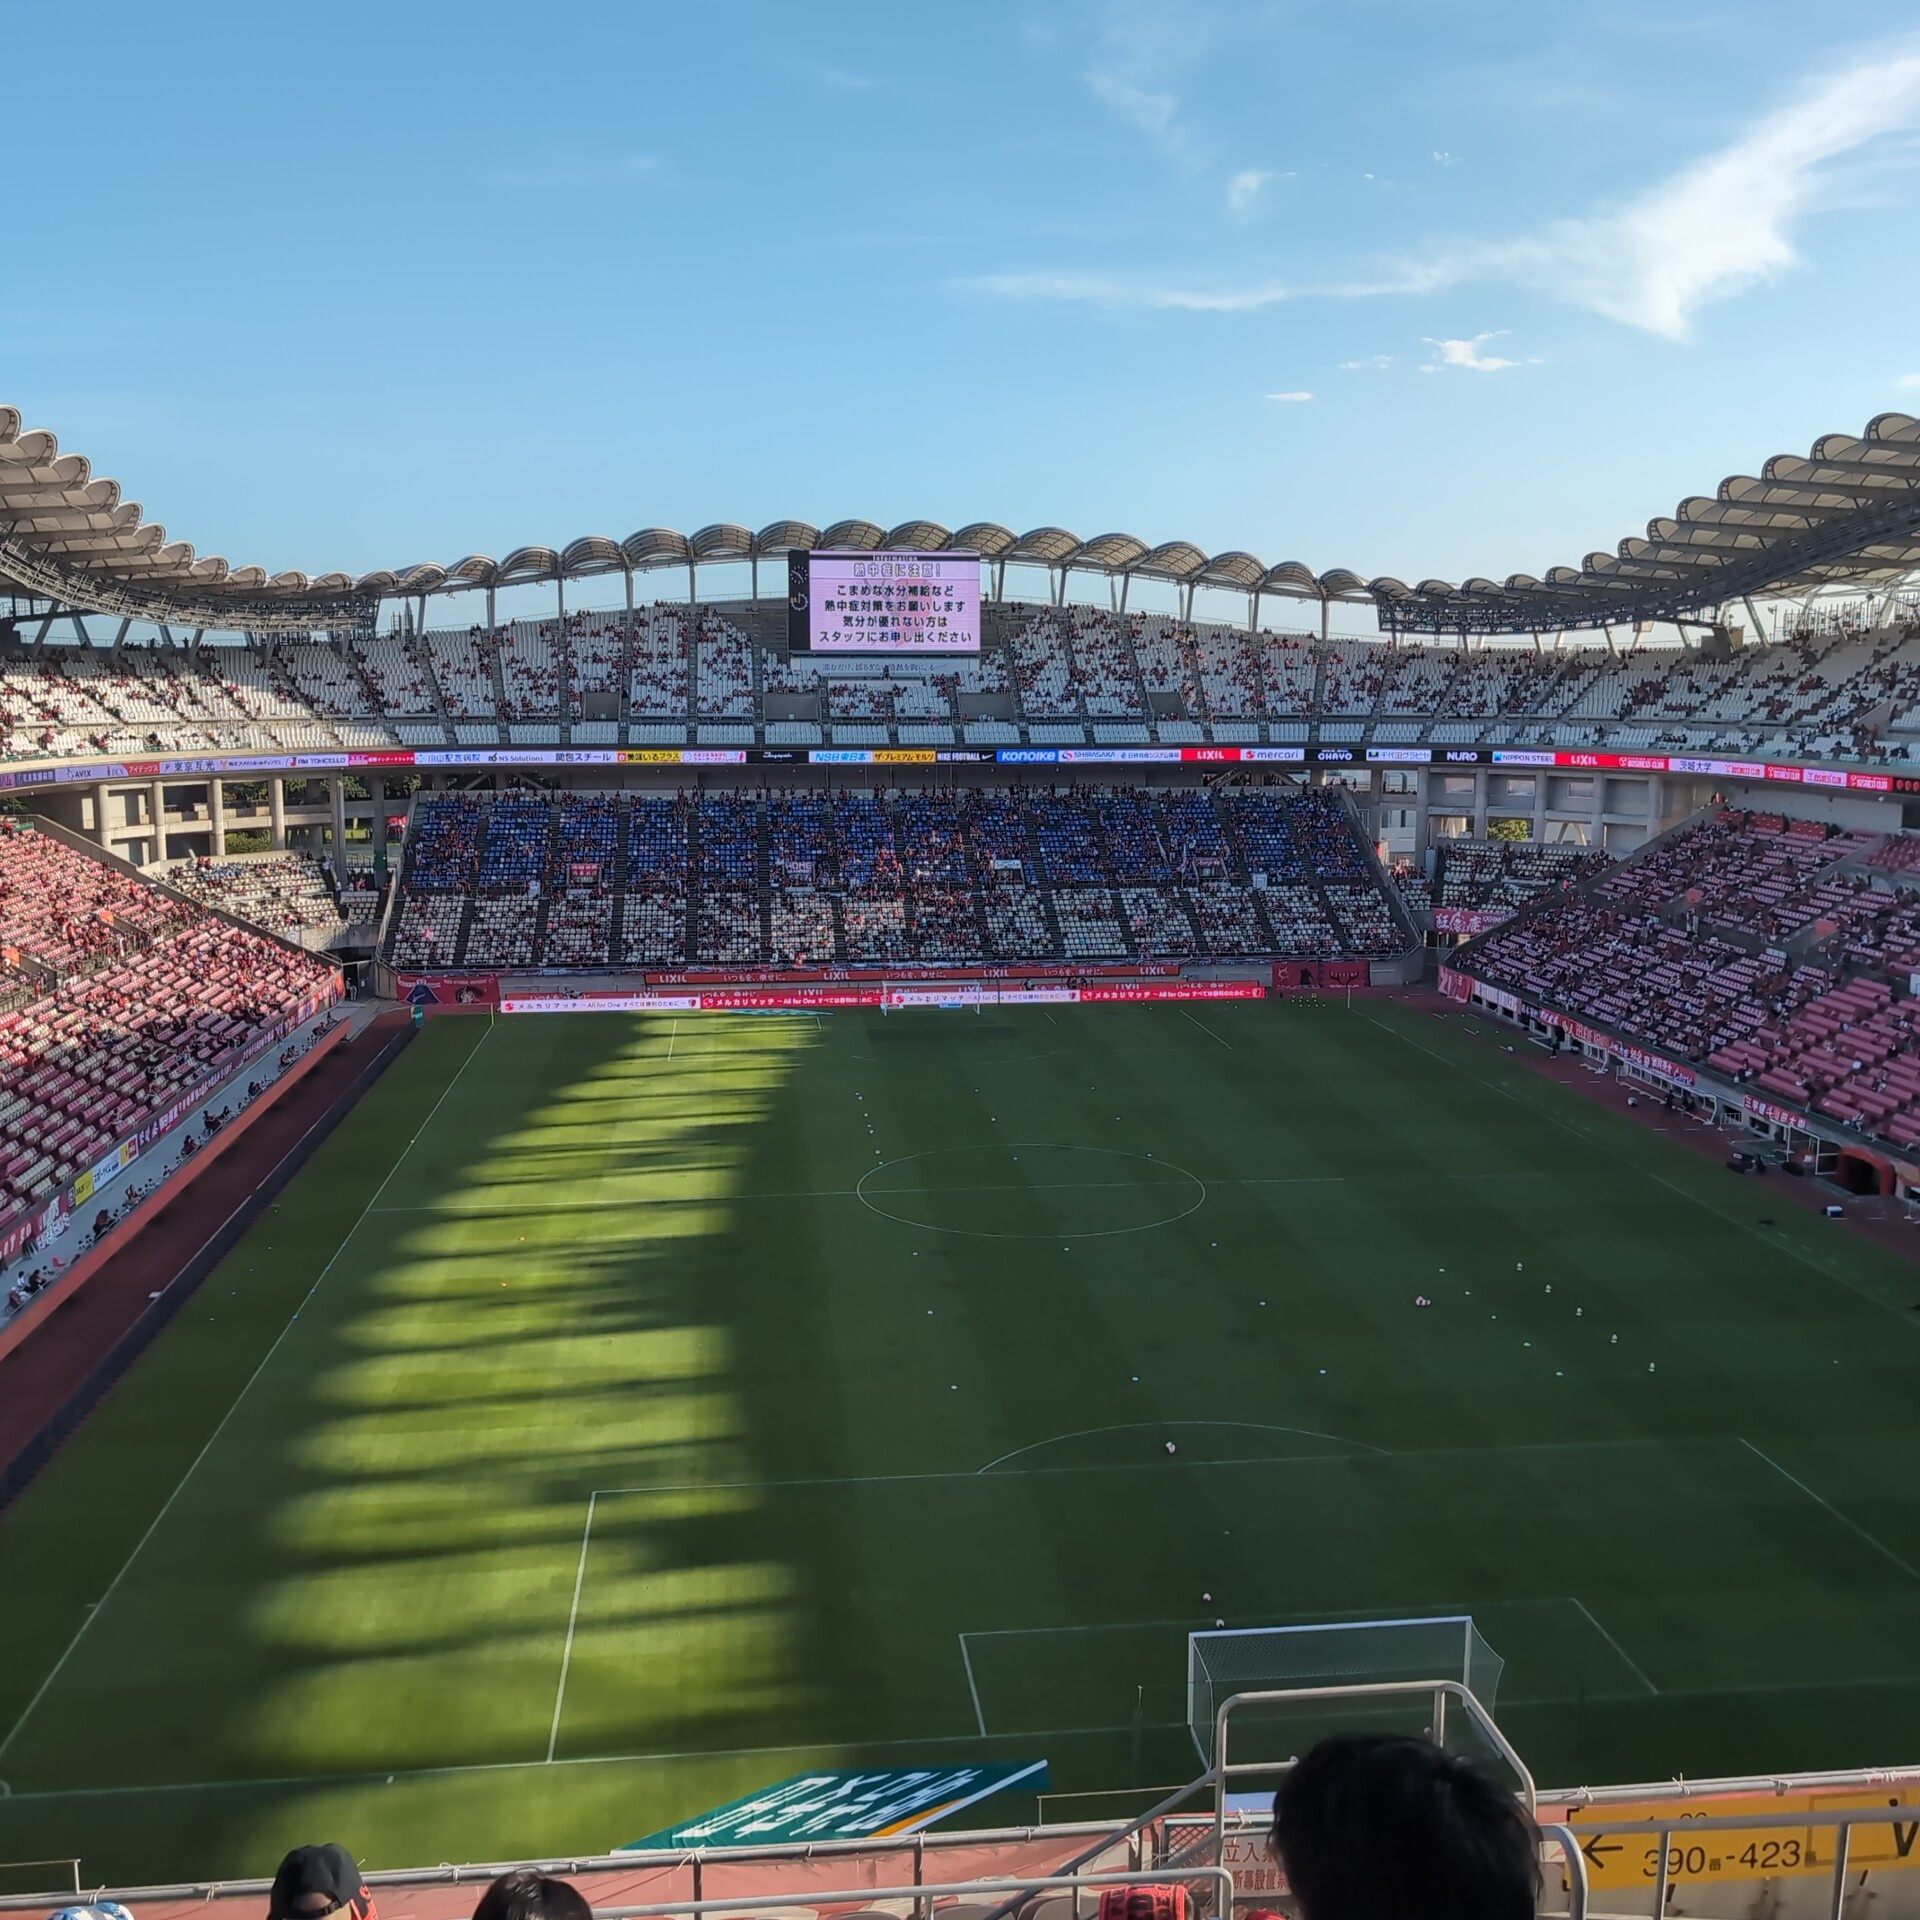

In [33]:
image

In [ ]:
print('入力：', input_text)
print('出力：', output_text)